In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key
from citipy import citipy
api_keys=weather_api_key


In [3]:
lat_lngs = []
cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
print(f"Number of cities in the list: {len(cities)}")
city

Number of cities in the list: 634


'avarua'

In [21]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
query_url=base_url +"&appid="+weather_api_key + "&q="
city_data=[]

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1
city_name=[]
city_humidity=[]
city_clouds=[]
city_country=[]
city_date=[]
city_lat=[]
city_lng=[]
city_max_temp=[]
city_wind=[]


response = requests.get(f'{query_url}{city}').json()
for city in cities:
    
    
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        city_clouds.append(response["clouds"]["all"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_humidity.append(response["main"]["humidity"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_wind.append(response["wind"]["speed"])
        print(f'Processing Record {record_count} | {city}')
        record_count = record_count + 1
    except KeyError:
        print(f'City not found. Skipping...')
    #time.sleep(1)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 | blackmans bay
Processing Record 2 | puerto natales
Processing Record 3 | papatowai
Processing Record 4 | hermanus
Processing Record 5 | yeniseysk
Processing Record 6 | wailua homesteads
Processing Record 7 | avarua
Processing Record 8 | adamstown
Processing Record 9 | edinburgh of the seven seas
Processing Record 10 | tongliao
Processing Record 11 | san luis de la loma
Processing Record 12 | mizdah
Processing Record 13 | anadyr
Processing Record 14 | port alfred
Processing Record 15 | albany
Processing Record 16 | ilulissat
Processing Record 17 | vorgashor
Processing Record 18 | zapala
Processing Record 19 | qaqortoq
Processing Record 20 | margaret river
Processing Record 21 | bikenibeu village
Processing Record 22 | bethel
Processing Record 23 | bilibino
Processing Record 24 | shimoda
City not found. Skipping...
Processing Record 25 | lebu
Processing Record 26 | hawaiian paradise park
Processing Record 2

In [35]:
City_data_frame =pd.DataFrame({
    "City":city_name,
 "Humidity":city_humidity,
 "Cloudiness":city_clouds,
 "Country":city_country,
 "Date":city_date,
 "Lat":city_lat,
 "Lng":city_lng,
 "Max Temp":city_max_temp,
 "Wind":city_wind
 })

City_data_frame.count()

City          612
Humidity      612
Cloudiness    612
Country       612
Date          612
Lat           612
Lng           612
Max Temp      612
Wind          612
dtype: int64

In [36]:
City_data_frame.head()

,City,Humidity,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind
0,Blackmans Bay,61,100,AU,1690169446,-43.0167,147.3167,288.00,4.28
1,Puerto Natales,92,76,CL,1690169537,-51.7236,-72.4875,268.00,1.46
2,Papatowai,90,94,NZ,1690169587,-46.5619,169.4708,282.41,0.60
3,Hermanus,68,53,ZA,1690169587,-34.4187,19.2345,283.72,2.99
4,Yeniseysk,56,7,RU,1690169587,58.4497,92.1703,298.92,1.50


In [37]:
City_data_frame.to_csv("cities.csv", index_label="City_ID")
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")
city_data_df.head()


,City,Humidity,Cloudiness,Country,Date,Lat,Lng,Max Temp,Wind
City_ID,,,,,,,,,
0,Blackmans Bay,61,100,AU,1690169446,-43.0167,147.3167,288.00,4.28
1,Puerto Natales,92,76,CL,1690169537,-51.7236,-72.4875,268.00,1.46
2,Papatowai,90,94,NZ,1690169587,-46.5619,169.4708,282.41,0.60
3,Hermanus,68,53,ZA,1690169587,-34.4187,19.2345,283.72,2.99
4,Yeniseysk,56,7,RU,1690169587,58.4497,92.1703,298.92,1.50


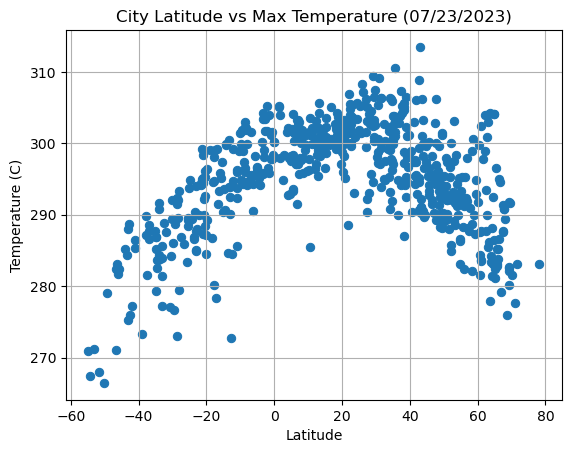

In [46]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"],  linewidth = .75)
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title("City Latitude vs Max Temperature (07/23/2023)")
plt.grid()
plt.savefig("Fig1.png")

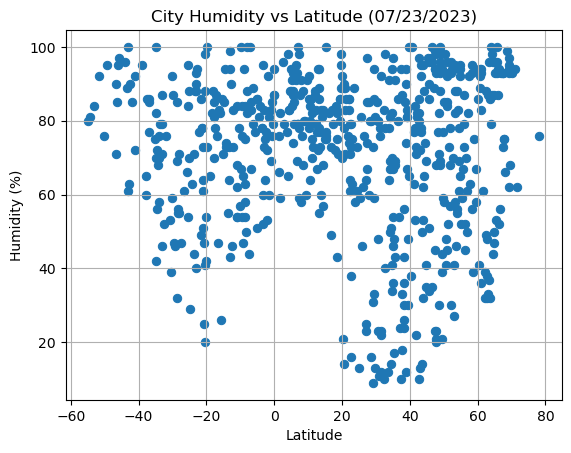

In [52]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],  linewidth = .75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Humidity vs Latitude (07/23/2023)")
plt.grid()
plt.savefig("Fig2.png")

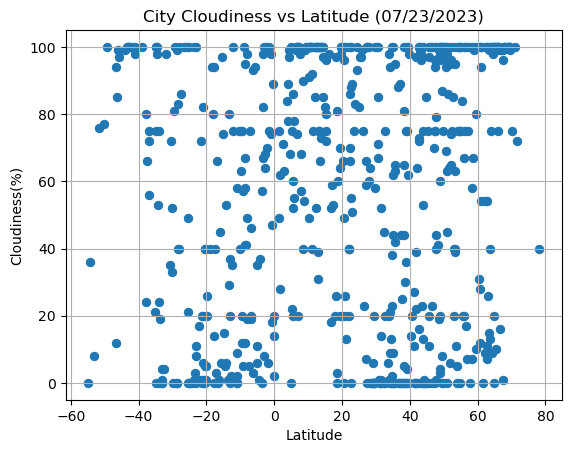

In [55]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"],  linewidth = .75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Cloudiness vs Latitude (07/23/2023)")
plt.grid()
plt.savefig("Fig3.png")

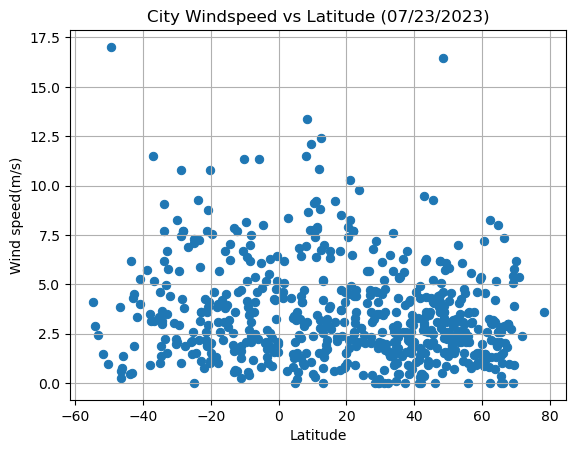

In [60]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind"],  linewidth = .75)
plt.xlabel("Latitude")
plt.ylabel("Wind speed(m/s)")
plt.title("City Windspeed vs Latitude (07/23/2023)")
plt.grid()
plt.savefig("Fig4.png")